In [106]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [107]:
data = pd.read_csv("data/data.csv")

# Preparing data

## 1. Decoding strings of bitmaps

In [108]:
def decode_bitmap(bitmap):
    byte_str = eval(bitmap).decode('utf-8')
    byte_list = list(map(int, byte_str.split(',')))
    byte_list = [value % 256 for value in byte_list]
    return byte_list

In [109]:
data['decoded_bitmap'] = data['bitmap'].apply(decode_bitmap)

# Analysing the data

## 1. How does the data look like?

In [110]:
def show_bitmaps(bitmap):
    image = np.array(bitmap, dtype=np.uint8)
    size = int(len(image)**0.5)
    img_array = image.reshape((size, size))
    
    return img_array

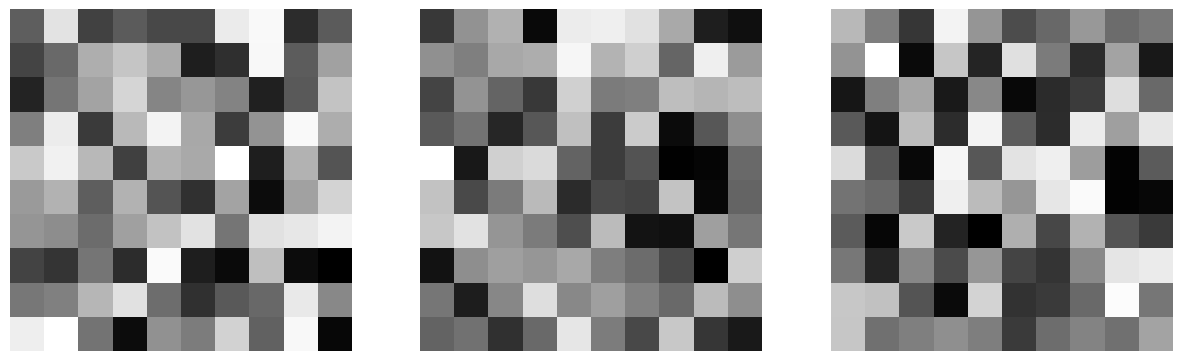

In [111]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    bitmap_data = data['decoded_bitmap'][i]
    img_array = show_bitmaps(bitmap_data)
    axes[i].imshow(img_array, cmap='gray')
    axes[i].axis('off')

## 2. What space groups can be found?

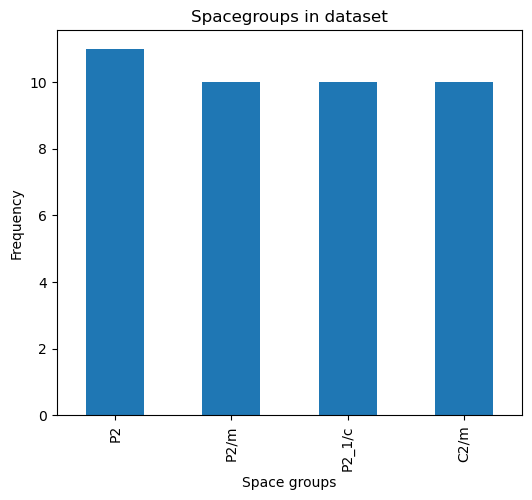

In [112]:
data['spacegroup'].value_counts().plot(kind='bar', figsize=(6, 5), title='Spacegroups in dataset', 
                                       xlabel='Space groups', ylabel='Frequency');

## 3. Histogram

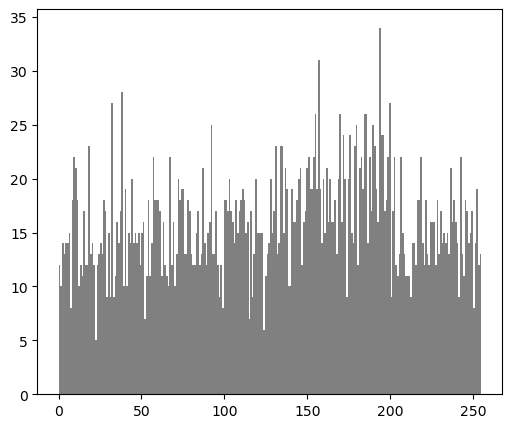

In [113]:
all_pixel_values = [pixel for sublist in data['decoded_bitmap'] for pixel in sublist]
all_pixel_values = np.array(all_pixel_values, dtype=np.uint8)

plt.figure(figsize=(6, 5))
plt.hist(all_pixel_values, bins=256, color='gray');

## 4. Average brightness per space group

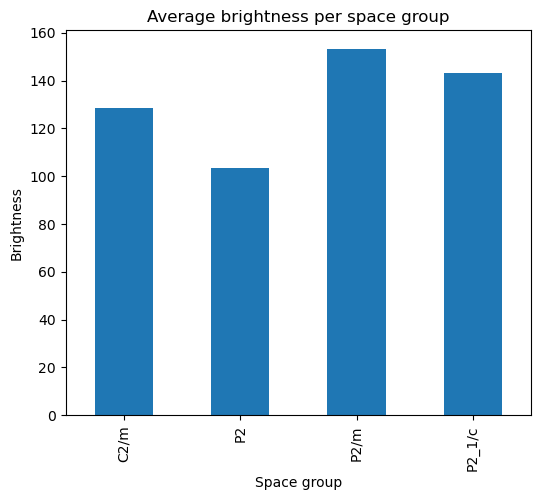

In [114]:
data['average_brightness'] = data['decoded_bitmap'].apply(lambda x: np.mean(x))
avg_brightness_per_group = data.groupby('spacegroup')['average_brightness'].mean()

avg_brightness_per_group.plot(kind='bar', figsize=(6, 5), title='Average brightness per space group',
                              xlabel='Space group', ylabel='Brightness');

## 5. Brightness distribution per space group

Text(0, 0.5, 'Brightness')

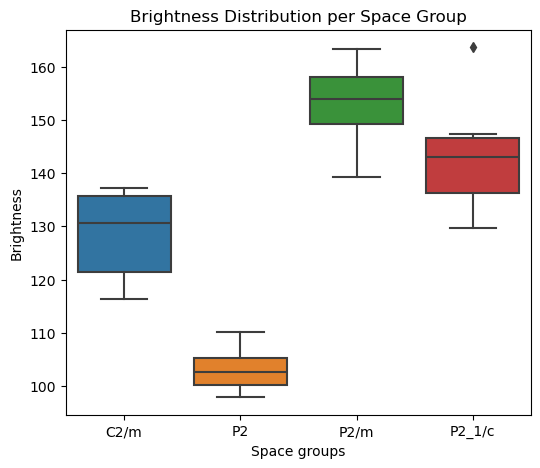

In [115]:
brightness_data = []
for spacegroup, group_data in data.groupby('spacegroup'):
    for brightness in group_data['decoded_bitmap']:
        brightness_data.append((spacegroup, np.mean(brightness)))

brightness_df = pd.DataFrame(brightness_data, columns=['spacegroup', 'brightness'])

plt.figure(figsize=(6, 5))
sns.boxplot(x='spacegroup', y='brightness', data=brightness_df)
plt.title('Brightness Distribution per Space Group')
plt.xlabel('Space groups')
plt.ylabel('Brightness')